In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.shape

(200000, 9)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
#task 1 : preprocess the data 

In [9]:
#dropping key and pickup_datetime ..feature selection

In [10]:
df=df.drop(columns=["key","pickup_datetime"]) 

In [11]:
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
#dropping null values 

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
import seaborn as sns

In [16]:
#task 2 - identify outliers

<Axes: ylabel='fare_amount'>

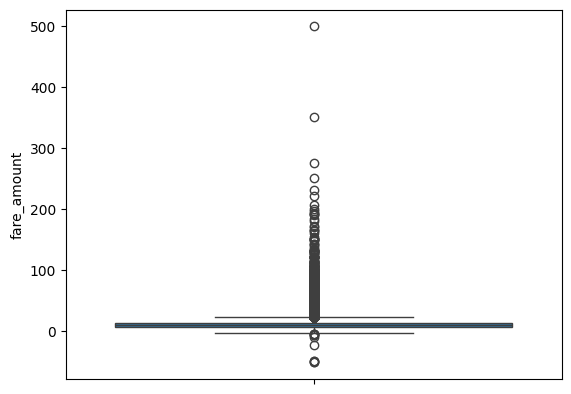

In [17]:
sns.boxplot(df["fare_amount"])

In [18]:
#removing outliers 

In [19]:
df=df[df["fare_amount"]<300]

In [20]:
df["fare_amount"]

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199997, dtype: float64

In [21]:
df["fare_amount"].max()

np.float64(275.0)

In [22]:
df["fare_amount"].min()

np.float64(-52.0)

In [23]:
df.shape

(199997, 7)

In [24]:
#task3-Check the correlation. 

In [25]:
import matplotlib.pyplot as plt

In [26]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000166,0.000219,-0.000332,0.000261,0.000281,0.002261
fare_amount,0.000166,1.000000,0.009491,-0.007694,0.008142,-0.010132,0.010209
pickup_longitude,0.000219,0.009491,1.000000,-0.816434,0.832998,-0.846296,-0.000446
pickup_latitude,-0.000332,-0.007694,-0.816434,1.000000,-0.774755,0.702322,-0.001534
dropoff_longitude,0.000261,0.008142,0.832998,-0.774755,1.000000,-0.916997,0.000006
dropoff_latitude,0.000281,-0.010132,-0.846296,0.702322,-0.916997,1.000000,-0.000631
passenger_count,0.002261,0.010209,-0.000446,-0.001534,0.000006,-0.000631,1.000000


<Axes: >

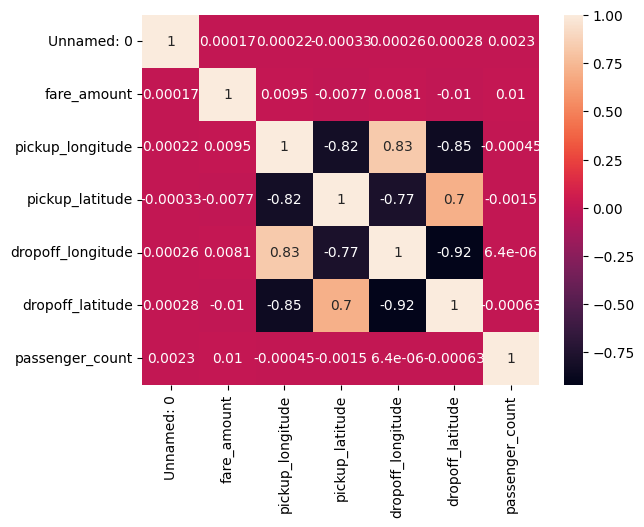

In [27]:
sns.heatmap(df.corr(),annot=True)
#plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=["fare_amount"])
y = df["fare_amount"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=98, test_size=0.2)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [29]:
#task4.  Implement linear regression and random forest regression models. 
#task5.  Evaluate the models and compare their respective scores like R2, RMSE, etc. 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score


linearRegression = LinearRegression()
linearRegression.fit(x_train_scaled, y_train)
lr_pred = linearRegression.predict(x_test_scaled)
r2_lr = r2_score(y_test, lr_pred)
rmse_lr = root_mean_squared_error(y_test, lr_pred)

In [31]:
print(f'Linear Regression R²: {r2_lr}, RMSE: {rmse_lr}')

Linear Regression R²: 0.00017915233424170562, RMSE: 9.822947774403797


In [32]:
from sklearn.ensemble import RandomForestRegressor

randomRegression = RandomForestRegressor(n_estimators=100, random_state=52)
randomRegression.fit(x_train_scaled, y_train)
rf_pred = randomRegression.predict(x_test_scaled)
r2_rf = r2_score(y_test, rf_pred)
rmse_rf = root_mean_squared_error(y_test, rf_pred)

In [34]:
print(f'Random Forest R²: {r2_rf}, RMSE: {rmse_rf}')


Random Forest R²: 0.7703180138540369, RMSE: 4.708084061755375
